<a href="https://colab.research.google.com/github/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/01_dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrames
## Introduction
Throughout this book we work with DataFrames. A DataFrame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![DataFrame Anatomy](https://github.com/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/dataframe_anatomy.png?raw=1)

We will get a brief insight on all these basic operation which can be performed on Pandas DataFrame :

1. Creating a DataFrame
1. Dealing with Rows and Columns
1. Indexing and Selecting Data
1. Working with Missing Data
1. Iterating over rows and columns

In the real world, a Pandas DataFrame will be created by loading the datasets from existing storage, storage can be SQL Database, CSV file, and Excel file. Pandas DataFrame can be created from the lists, dictionary, and from a list of dictionary etc. Dataframe can be created in different ways here are some ways by which we create a dataframe:

## Creating a dataframe using List:
DataFrame can be created using a single list or a list of lists.

In [0]:
import pandas as pd

Create a list of strings

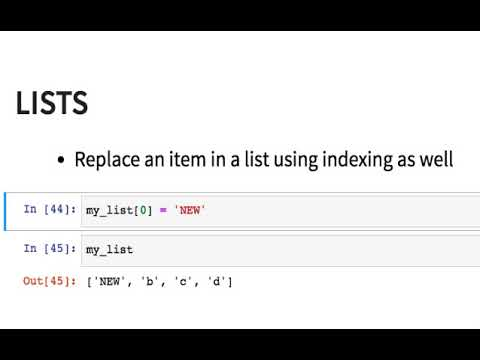

In [0]:
#@title Introducing Lists { display-mode: "form" }
#@markdown This 4-minute video gives an overview of the key features of Booleans:
from IPython.display import YouTubeVideo
YouTubeVideo('BCN4PRoQnI4', width=600, height=400)

In [0]:
state_lst = ['California','Texas','New York','Florida','Illinois']

Call the DataFrame constructor on the list.

In [0]:
df = pd.DataFrame(state_lst)

In [0]:
df

,0
0,California
1,Texas
2,New York
3,Florida
4,Illinois


## Creating DataFrame from dict of ndarray/lists: 
To create DataFrame from dict of narray/list, all the narray must be of same length. If index is passed then the length index should be equal to the length of arrays. If no index is passed, then by default, index will be range(n) where n is the array length.

Intialise dictionary of lists.

In [0]:
data = {'state':['California','Texas','New York','Florida','Illinois'],
        'pop':[3833252,26448193,19651127,19552860,12882135],
        'area': [423967,695662,141297,170312,149995]}

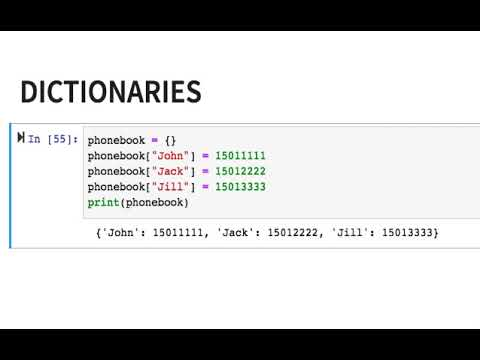

In [0]:
#@title Introducing Dictionaries { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Booleans:
from IPython.display import YouTubeVideo
YouTubeVideo('1LRepvqzXzM', width=600, height=400)

In [0]:
df = pd.DataFrame(data)

In [0]:
df.set_index(keys='state', inplace=True)

In [0]:
df

,pop,area
state,,
California,3833252,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


## Dealing with Rows and Columns

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. We can perform basic operations on rows/columns like selecting, deleting, adding, and renaming.

### Column Selection:
The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:

In [0]:
df['area']

state_name
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [0]:
df.area

state_name
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Though this is a useful shorthand, keep in mind that it does not work for all cases! For example, if the column names are not strings, or if the column names conflict with methods of the DataFrame, this attribute-style access is not possible. For example, the DataFrame has a `pop()` method, so `data.pop` will point to this rather than the "pop" column:

In [0]:
df.pop is df['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use `data['pop'] = z` rather than `data.pop = z`).

Like with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [0]:
df['density'] = df['pop'] / df['area']

In [0]:
df

,pop,area,density
state,,,
California,3833252,423967,9.041392
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


## Select Multiple Columns



In [0]:
df[['density','area']]

,density,area
state,,
California,9.041392,423967
Texas,38.018740,695662
New York,139.076746,141297
Florida,114.806121,170312
Illinois,85.883763,149995


## Row Selection: 
Pandas provide a unique method to retrieve rows from a Data frame. `DataFrame.loc[]` method is used to retrieve rows from Pandas DataFrame. Rows can also be selected by passing integer location to an `iloc[]` function.

In [0]:
df.loc["California"]

pop        3.833252e+06
area       4.239670e+05
density    9.041392e+00
Name: California, dtype: float64

In [0]:
df.loc["Texas"]

pop        2.644819e+07
area       6.956620e+05
density    3.801874e+01
Name: Texas, dtype: float64

## Indexing and Selecting Data

Indexing in pandas means simply selecting particular rows and columns of data from a DataFrame. Indexing could mean selecting all the rows and some of the columns, some of the rows and all of the columns, or some of each of the rows and columns. Indexing can also be known as Subset Selection.

### Indexing a Dataframe using indexing operator [] :
Indexing operator is used to refer to the square brackets following an object. The `.loc` and `.iloc` indexers also use the indexing operator to make selections. In this indexing operator to refer to `df[]`.

#### Selecting Single Columns
In order to select a single column, we simply put the name of the column in-between the brackets

In [0]:
df['density']

state
California      9.041392
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
Name: density, dtype: float64

#### Selecting Multiple Columns

In [0]:
df[['area','density']]

,area,density
state,,
California,423967,9.041392
Texas,695662,38.018740
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


### Indexing a DataFrame using .loc[ ] :
This function selects data by the label of the rows and columns. The df.loc indexer selects data in a different way than just the indexing operator. It can select subsets of rows or columns. It can also simultaneously select subsets of rows and columns.

#### Selecting a single row
In order to select a single row using .loc[], we put a single row label in a .loc function.

In [0]:
df.loc["Florida"]

pop        1.955286e+07
area       1.703120e+05
density    1.148061e+02
Name: Florida, dtype: float64

#### Selecting multiple rows

In [0]:
df.loc[['Florida','Illinois']]

,pop,area,density
state,,,
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Indexing a DataFrame using .iloc[ ] :
This function allows us to retrieve rows and columns by position. In order to do that, we’ll need to specify the positions of the rows that we want, and the positions of the columns that we want as well. The df.iloc indexer is very similar to df.loc but only uses integer locations to make its selections.


#### Selecting a single row
In order to select a single row using `.iloc[]`, we can pass a single integer to `.iloc[]` function.

In [0]:
df.iloc[2]

pop        1.965113e+07
area       1.412970e+05
density    1.390767e+02
Name: New York, dtype: float64

#### Selecting multiple rows

In [0]:
df.iloc[[0,2]]

,pop,area,density
state,,,
California,3833252,423967,9.041392
New York,19651127,141297,139.076746


[Next Section: Data Import](https://colab.research.google.com/github/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/02_data_import.ipynb)